In [4]:
pip install reviews

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.0/110.0 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.1/58.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.6/297.6 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.4/134.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 28.1 MB/s eta 0:00:00
  Attempting uninstall: markdown-it-py
    Found existing installation: markdown-it-py 3.0.0
    Uninstalling markdown-it-py-3.0.0:
      Successfully uninstalled markdown-it-py-3.0.0
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
 

In [102]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from reviews import *

In [103]:
df=pd.read_csv("/content/Viral_Social_Media_Trends.csv")

In [104]:
df.head()

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium


In [105]:
df.tail()

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
4995,Post_4996,YouTube,#Education,Video,Japan,4258236,381509,59209,4674,High
4996,Post_4997,Instagram,#Education,Video,UK,4841525,166266,54841,4832,Medium
4997,Post_4998,YouTube,#Fashion,Shorts,USA,2004080,32401,75229,33875,Low
4998,Post_4999,Instagram,#Gaming,Shorts,Canada,2221665,46996,12954,42832,Low
4999,Post_5000,Instagram,#Fashion,Reel,Japan,2224007,72744,29945,46381,Low


In [106]:
df.describe()

,Views,Likes,Shares,Comments
count,5.000000e+03,5000.000000,5000.000000,5000.000000
mean,2.494066e+06,251475.029800,50519.562000,24888.393800
std,1.459490e+06,144349.583384,29066.362671,14284.504319
min,1.266000e+03,490.000000,52.000000,18.000000
25%,1.186207e+06,126892.250000,25029.000000,12305.250000
50%,2.497373e+06,249443.000000,50839.500000,25004.000000
75%,3.759781e+06,373970.750000,75774.250000,37072.750000
max,4.999430e+06,499922.000000,99978.000000,49993.000000


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Post_ID           5000 non-null   object
 1   Platform          5000 non-null   object
 2   Hashtag           5000 non-null   object
 3   Content_Type      5000 non-null   object
 4   Region            5000 non-null   object
 5   Views             5000 non-null   int64 
 6   Likes             5000 non-null   int64 
 7   Shares            5000 non-null   int64 
 8   Comments          5000 non-null   int64 
 9   Engagement_Level  5000 non-null   object
dtypes: int64(4), object(6)
memory usage: 390.8+ KB


In [108]:
print(df.dtypes)

Post_ID             object
Platform            object
Hashtag             object
Content_Type        object
Region              object
Views                int64
Likes                int64
Shares               int64
Comments             int64
Engagement_Level    object
dtype: object


In [109]:
print(df.isnull().sum())

Post_ID             0
Platform            0
Hashtag             0
Content_Type        0
Region              0
Views               0
Likes               0
Shares              0
Comments            0
Engagement_Level    0
dtype: int64


In [110]:
df.drop_duplicates()

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium
3,Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low
4,Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium
...,...,...,...,...,...,...,...,...,...,...
4995,Post_4996,YouTube,#Education,Video,Japan,4258236,381509,59209,4674,High
4996,Post_4997,Instagram,#Education,Video,UK,4841525,166266,54841,4832,Medium
4997,Post_4998,YouTube,#Fashion,Shorts,USA,2004080,32401,75229,33875,Low
4998,Post_4999,Instagram,#Gaming,Shorts,Canada,2221665,46996,12954,42832,Low


In [111]:
len(df)

5000

In [112]:
top_five=df.sort_values(by='Views',ascending=False)
top_five.head(5)

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
675,Post_676,YouTube,#Dance,Live Stream,Canada,4999430,419635,51709,19836,Low
2600,Post_2601,YouTube,#Tech,Live Stream,Germany,4999077,490971,6444,16296,Medium
1841,Post_1842,Instagram,#Music,Reel,India,4997766,113205,99750,26950,Low
650,Post_651,Twitter,#Challenge,Post,Brazil,4997429,77831,85735,28182,Low
3603,Post_3604,TikTok,#Dance,Video,Brazil,4997284,394892,60213,17338,Medium


In [113]:
top_five=df.sort_values(by='Shares',ascending=False)
top_five.head(5)

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
791,Post_792,TikTok,#Music,Tweet,Canada,149515,62294,99978,25533,Low
4365,Post_4366,Twitter,#Comedy,Live Stream,USA,947096,449377,99953,19082,Low
1074,Post_1075,YouTube,#Fashion,Post,USA,1984393,375236,99926,43802,Medium
4626,Post_4627,YouTube,#Tech,Reel,Australia,1263445,463074,99903,34170,Low
3289,Post_3290,TikTok,#Gaming,Live Stream,Brazil,2798360,63857,99902,10497,High


In [114]:
top_five=df.sort_values(by='Likes',ascending=False)
top_five.head(5)

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
3133,Post_3134,TikTok,#Fitness,Shorts,Germany,2973845,499922,38576,19020,High
2521,Post_2522,YouTube,#Fitness,Post,Australia,1917861,499874,92567,19082,Low
526,Post_527,TikTok,#Tech,Video,USA,309064,499745,31698,23489,Medium
1544,Post_1545,YouTube,#Gaming,Shorts,USA,4910553,499704,34160,9319,Low
3324,Post_3325,Instagram,#Dance,Shorts,UK,133501,499664,49136,9299,Low


In [115]:
top_five=df.sort_values(by='Comments',ascending=False)
top_five.head(5)

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level
1667,Post_1668,TikTok,#Education,Shorts,Canada,295569,56857,20351,49993,Medium
2352,Post_2353,YouTube,#Fitness,Reel,USA,16896,474590,4148,49986,Low
180,Post_181,Twitter,#Viral,Shorts,USA,3712060,302466,63802,49953,Low
3751,Post_3752,TikTok,#Dance,Shorts,Australia,3927986,316772,85104,49951,High
4563,Post_4564,TikTok,#Gaming,Live Stream,UK,2156983,283478,46690,49938,Low


In [116]:
avg_platform_used_df=df.groupby('Platform')['Views'].mean()

<ipython-input-117-04c7195b48b6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Platform', palette='viridis')


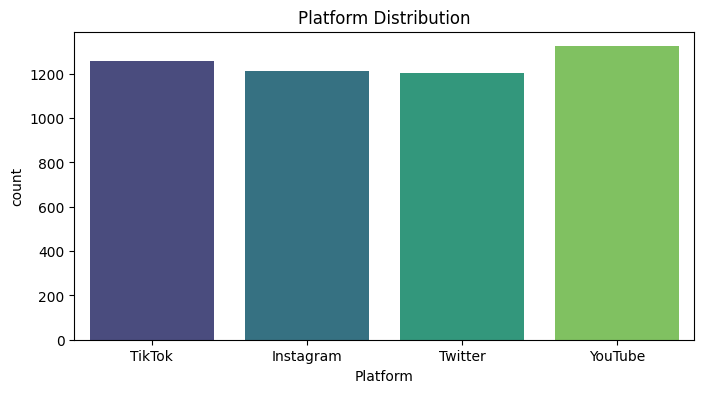

In [117]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Platform', palette='viridis')
plt.title('Platform Distribution')
plt.show()

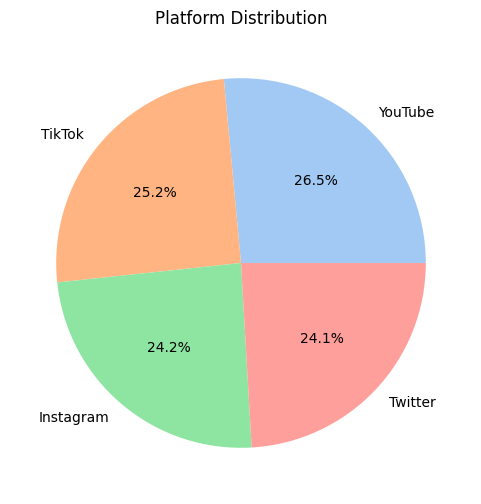

In [118]:
platform_counts = df['Platform'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Platform Distribution')
plt.show()

<ipython-input-119-270992debdd6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Content_Type', y='Likes', data=df, palette='Set2')


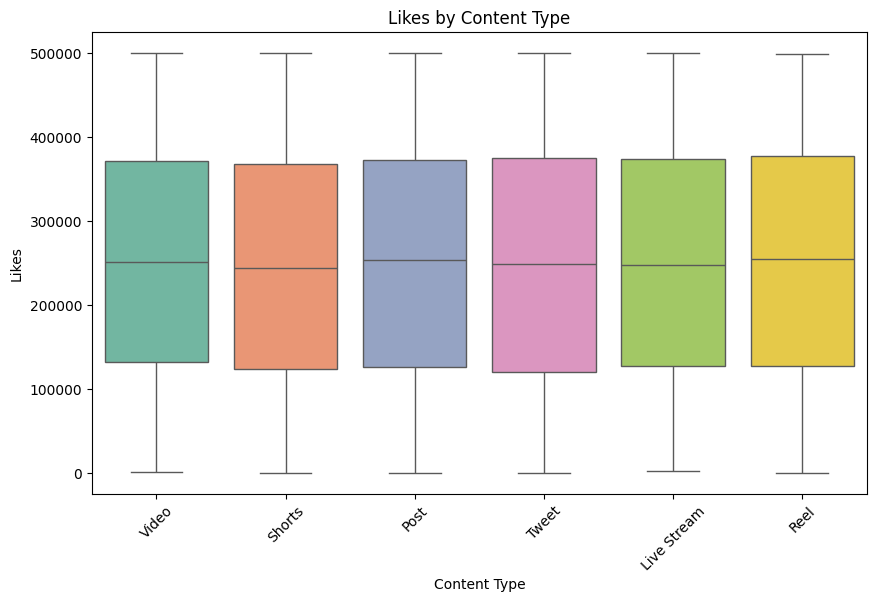

In [119]:
# Relationship between engagement and content type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Content_Type', y='Likes', data=df, palette='Set2')
plt.title('Likes by Content Type')
plt.xlabel('Content Type')
plt.ylabel('Likes')
plt.xticks(rotation=45)
plt.show()

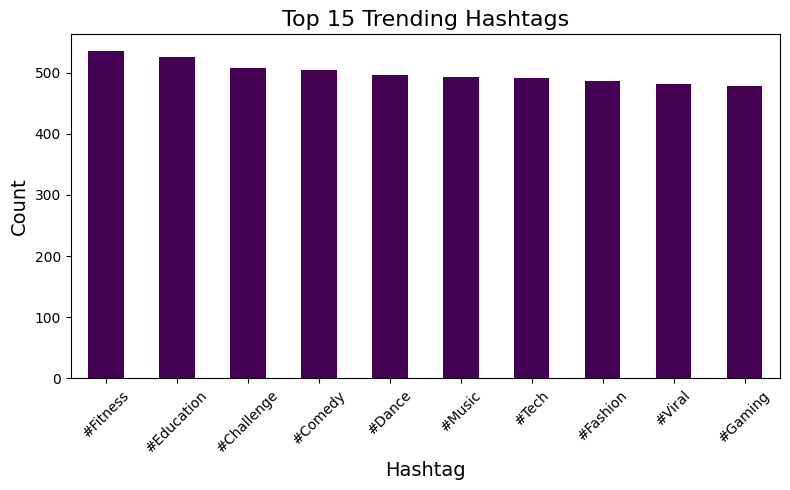

In [120]:
# Plot distribution of trending hashtags (top 15)
plt.figure(figsize=(8, 5))
df['Hashtag'].value_counts().head(15).plot(kind='bar', colormap='viridis')
plt.title('Top 15 Trending Hashtags', fontsize=16)
plt.xlabel('Hashtag', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-121-7869a9a08659>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='Region', data=df[df['Region'].isin(top_regions)],


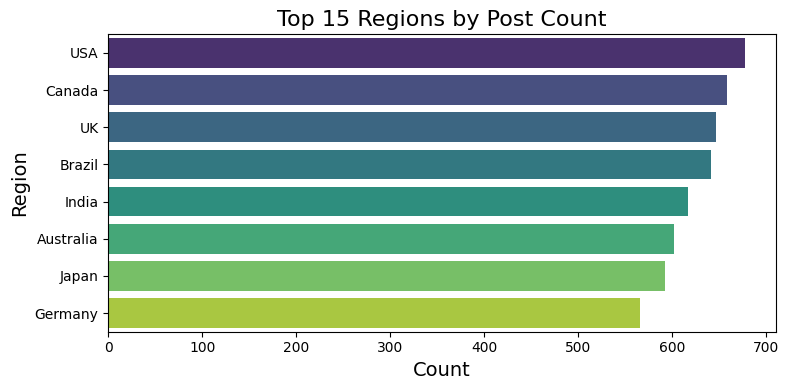

In [121]:
top_regions = df['Region'].value_counts().head(15).index
plt.figure(figsize=(8, 4))
sns.countplot(y='Region', data=df[df['Region'].isin(top_regions)],
              order=df['Region'].value_counts().head(15).index,
              palette="viridis")
plt.title('Top 15 Regions by Post Count', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Region', fontsize=14)
plt.tight_layout()
plt.show()

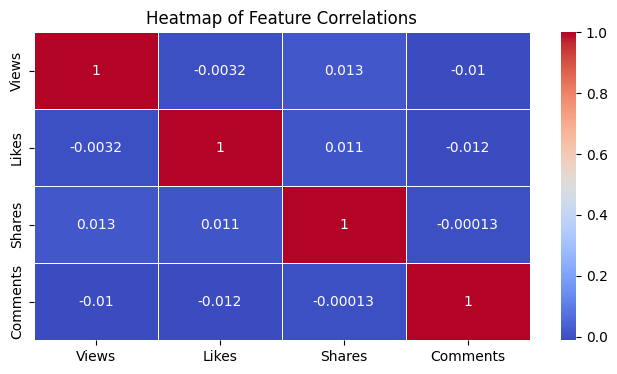

In [122]:
plt.figure(figsize=(8, 4))
sns.heatmap(df[['Views', 'Likes', 'Shares', 'Comments']].corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Heatmap of Feature Correlations')
plt.savefig('heatmap.png')
plt.show()

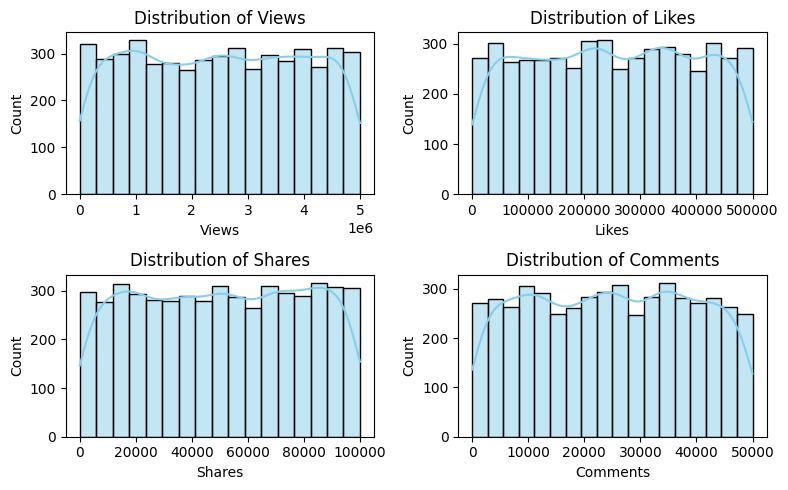

In [123]:
numeric_cols = ['Views', 'Likes', 'Shares', 'Comments']
plt.figure(figsize=(8, 5))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 2, i + 1)
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

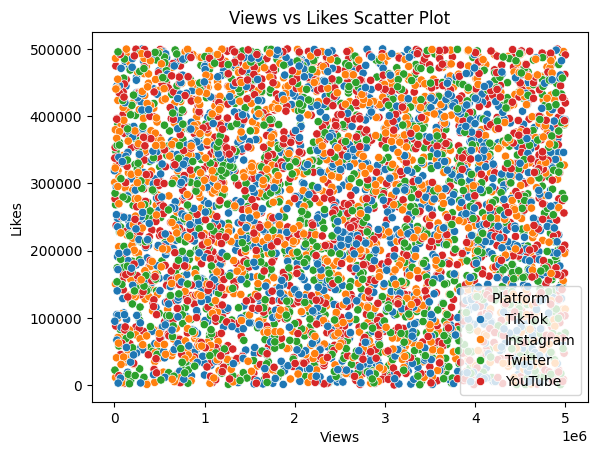

In [124]:
sns.scatterplot(x='Views', y='Likes', hue='Platform', data=df)
plt.title('Views vs Likes Scatter Plot')
plt.show()

In [125]:
#Engagement Analysis

# Engagement by content type
engagement_by_content = df.groupby('Content_Type')[['Likes', 'Shares', 'Comments']].mean()
print("\nAverage Engagement by Content Type:")
print(engagement_by_content)

# Engagement by platform
engagement_by_platform = df.groupby('Platform')[['Likes', 'Shares', 'Comments']].mean()
print("\nAverage Engagement by Platform:")
print(engagement_by_platform)

# Engagement by region
engagement_by_region = df.groupby('Region')[['Likes', 'Shares', 'Comments']].mean()
print("\nAverage Engagement by Region:")
print(engagement_by_region)


Average Engagement by Content Type:
                      Likes        Shares      Comments
Content_Type                                           
Live Stream   248811.616374  49921.960234  25167.635088
Post          252784.174678  50164.198124  24554.968347
Reel          255011.068966  51357.868014  25223.405470
Shorts        247926.202033  49593.954257  25060.411690
Tweet         249384.470096  51427.454545  24635.985646
Video         254768.923913  50614.386473  24694.614734

Average Engagement by Platform:
                   Likes        Shares      Comments
Platform                                            
Instagram  257118.217822  50310.909241  24958.113861
TikTok     244206.719841  51468.256349  24778.696825
Twitter    245880.118771  50227.750831  24456.857143
YouTube    258314.002266  50073.091390  25321.390483

Average Engagement by Region:
                   Likes        Shares      Comments
Region                                              
Australia  254386.139535  5

# **ML**

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf

In [139]:
def assign_engagement_level(row):
    engagement_rate = (row['Likes'] + row['Comments'] + row['Shares']) / row['Views']

    if engagement_rate >= 0.10:
        return "High"
    elif engagement_rate >= 0.05:
        return "Medium"
    else:
        return "Low"


df['Engagement_Level_Calculated'] = df.apply(assign_engagement_level, axis=1)
df.head()

,Post_ID,Platform,Hashtag,Content_Type,Region,Views,Likes,Shares,Comments,Engagement_Level,Engagement_Level_Calculated
0,Post_1,TikTok,#Challenge,Video,UK,4163464,339431,53135,19346,High,Medium
1,Post_2,Instagram,#Education,Shorts,India,4155940,215240,65860,27239,Medium,Medium
2,Post_3,Twitter,#Challenge,Video,Brazil,3666211,327143,39423,36223,Medium,High
3,Post_4,YouTube,#Education,Shorts,Australia,917951,127125,11687,36806,Low,High
4,Post_5,TikTok,#Dance,Post,Brazil,64866,171361,69581,6376,Medium,High


In [140]:
# Engagement Level Correlation Analysis
from scipy.stats import pearsonr
le = LabelEncoder()
lab1 = le.fit_transform(df["Engagement_Level"])
lab2 = le.fit_transform(df["Engagement_Level_Calculated"])

corr, p_value = pearsonr(lab1, lab2)
print(f"Pearson Correlation: {corr:.3f}")
print(f"P-value: {p_value:.5f}")

Pearson Correlation: 0.019
P-value: 0.17786


In [141]:
df_filtered = df[
    (df["Likes"] <= df["Views"]) &
    (df["Comments"] <= df["Views"]) &
    (df["Shares"] <= df["Views"]) &
    (df["Likes"] / df["Views"] <= 0.3)  # Maximum 30% Likes/Views
]

In [142]:
df_filtered = df_filtered.drop(["Engagement_Level"],axis = 1)
# Map the engagement levels manually
df_filtered["Engagement_Level_Calculated"] = df_filtered["Engagement_Level_Calculated"].map({
    "Low": 0,
    "Medium": 1,
    "High": 2
})

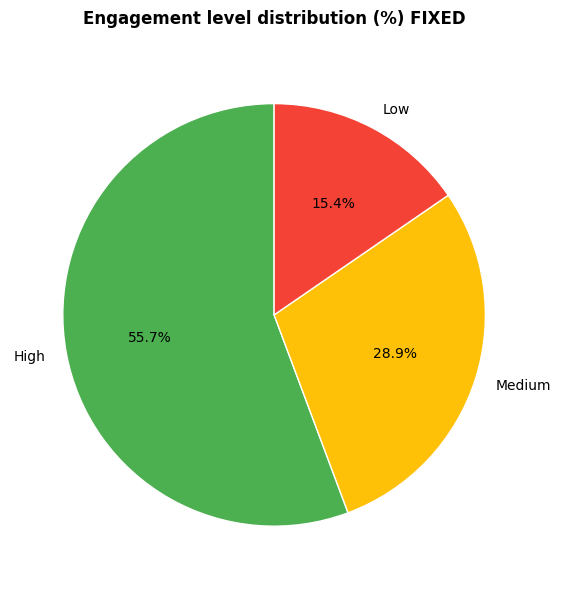

In [143]:
engagement_counts2 = df_filtered["Engagement_Level_Calculated"].value_counts()
percentages = (engagement_counts2 / len(df)) * 100

# Create the pie chart
labels = ['High', 'Medium', 'Low']

plt.figure(figsize=(8, 6))
plt.pie(
    percentages,
    labels=labels,
    autopct='%.1f%%',
    startangle=90,
    colors=['#4CAF50', '#FFC107', '#F44336'],
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

plt.title("Engagement level distribution (%) FIXED", fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [144]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Features and target variable
features = ['Views', 'Likes', 'Shares', 'Comments']
X = df_filtered[features]
y = df_filtered['Engagement_Level_Calculated']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3,  random_state = 42)



model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


print(classification_report(y_test, y_pred))

#Evaluation

# AUC-ROC for multi-class classification
y_prob = model.predict_proba(X_test)  # Get the probabilities for all classes
print("TEST: AUC-ROC:", roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted'))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       180
           1       0.89      0.90      0.90       341
           2       0.97      0.97      0.97       713

    accuracy                           0.94      1234
   macro avg       0.93      0.93      0.93      1234
weighted avg       0.94      0.94      0.94      1234

TEST: AUC-ROC: 0.9930275858654792


In [145]:
print(y_pred[:10])
print(y_test[:10])

[0 2 2 1 2 1 2 0 1 0]
174     0
196     2
637     2
2782    1
3040    2
3983    2
4432    2
3807    0
4456    1
84      0
Name: Engagement_Level_Calculated, dtype: int64


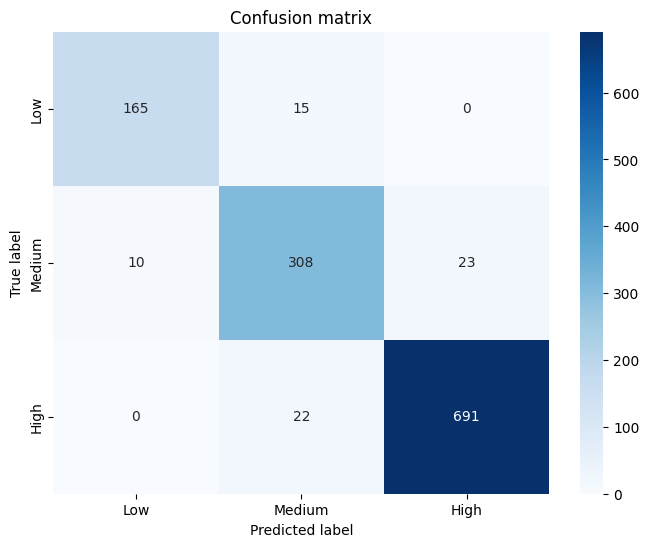

In [146]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.title("Confusion matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# **Overfitting**

In [147]:
y_train_pred = model.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_pred)


print(f"Training Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Check for overfitting
if train_acc - test_acc > 0.05:
    print("Possible overfitting detected!")
else:
    print("No significant overfitting detected.")

Training Accuracy: 1.0000
Test Accuracy: 0.9433
Possible overfitting detected!


In [148]:
from sklearn.metrics import roc_auc_score


y_train_prob = model.predict_proba(X_train)
y_test_prob = model.predict_proba(X_test)

# Compute AUC-ROC
train_auc = roc_auc_score(y_train, y_train_prob, multi_class='ovr', average='weighted')
test_auc = roc_auc_score(y_test, y_test_prob, multi_class='ovr', average='weighted')

print(f"Training AUC-ROC: {train_auc:.4f}")
print(f"Test AUC-ROC: {test_auc:.4f}")

if train_auc - test_auc > 0.05:
    print("Possible overfitting detected based on AUC-ROC.")
else:
    print("No significant overfitting detected based on AUC-ROC.")

Training AUC-ROC: 1.0000
Test AUC-ROC: 0.9930
No significant overfitting detected based on AUC-ROC.


In [149]:
from sklearn.model_selection import cross_val_score

In [150]:
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')


print(f"Cross Validation Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")
print(f"Standard Deviation: {cv_scores.std():.4f}")

Cross Validation Scores: [0.95018226 0.94896719 0.94403893 0.94038929 0.94647202]
Mean CV Accuracy: 0.9460
Standard Deviation: 0.0035
